In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
%matplotlib notebook
%reload_ext autoreload

## Generation of Gamma Process

 - Gamma process is easy to generate. Algorithm used is defined in: https://arxiv.org/pdf/2105.09429.pdf
 
 - Poisson epochs easily generated as cumulative sum of exponential random variables

<IPython.core.display.Javascript object>


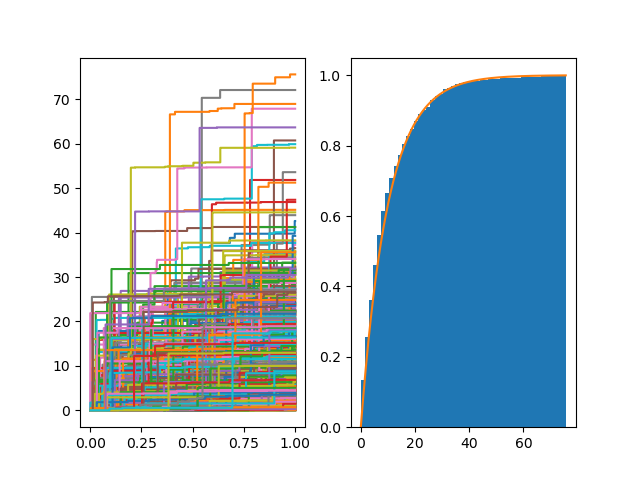

In [2]:
from processes import gen_gamma_process, marginal_gamma, gamma_cdf
C = 1.
BETA = 0.1
samps = 10000
T=1.

fig, [ax1, ax2] = plt.subplots(ncols=2)
endps1 = generate_and_plot(lambda: gen_gamma_process(C, BETA, 1./T, samps, maxT=T), 1000, ax1)
xs = np.linspace(0.0001, np.max(endps1), samps)
ax2.hist(endps1, bins=50, density=True, cumulative=True)
# marginal_gamma(xs, T, C, BETA, ax2)
gamma_cdf(xs, T, C, BETA, ax2)
fig.show()

Need a little bit more convincing that overflows in the generation of this process are fine to ignore... Histogram seems to converge anyway

## Variance-Gamma Process (Mean-Mixtures)

We can use this gamma sampler as a *subordinator* to *time deform* a Brownian Motion process. This applies to a more general class of processes whose samples are modelled as:

$$Y = \mu + {\sigma}^2\beta + \sigma U \quad \text{where} \quad U \sim \mathcal{N}(0, 1)$$

For the Variance-Gamma process: ${\sigma}^2 \sim \Gamma (\nu, \frac{\gamma^2}{2})$

But in general, any mean-mixture model with an *infinitely divisible* distribution for $\sigma^2$ can be generated using an appropriate subordinator and parent process.

In [9]:
from processes import variance_gamma
from scipy.stats import norm, t, gamma
from tqdm import tqdm

MU = 0.
SIGMA_S = 1.0
T=1.

# tau = gamma.rvs(C*T, scale=1/BETA, size=1000)
# xvgm = np.zeros(1000)
# for i in range(tau.shape[0]):
#     xvgm[i] = norm.rvs(MU, 1/)

<IPython.core.display.Javascript object>


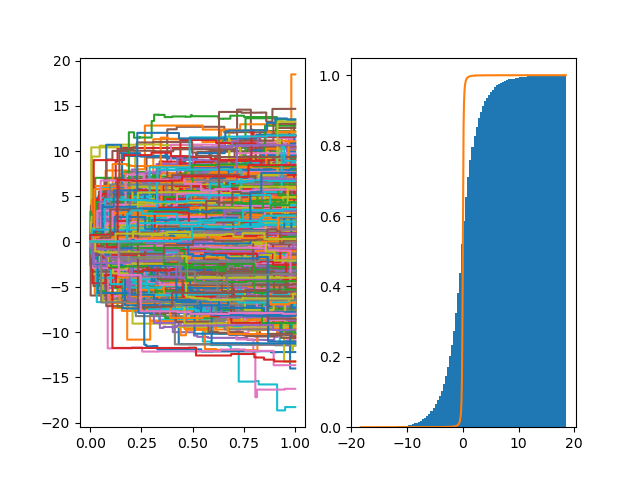

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 160.42it/s]


In [10]:
psamps = 500
endps2 = np.zeros(psamps)
fig, [ax1, ax2] = plt.subplots(ncols=2)
for i in tqdm(range(psamps)):
    _, G = gen_gamma_process(C, BETA, 1/T, 1000, maxT=T)
    endps2[i] = generate_and_plot(lambda: variance_gamma(MU, SIGMA_S, G, maxT=T), 1, ax1, hlines=False)
xs = np.linspace(np.min(endps2), np.max(endps2), 1000)
ax2.hist(endps2, bins=100, density=True, cumulative=True)
ax2.plot(xs, t.cdf(xs, 2*C*T, loc=MU, scale=BETA*SIGMA_S/C))
# ax2.set_ylim([0., 0.25])
fig.show()

Definitely an issue that needs fixing here